In [25]:
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [2]:
with open('census.pkl', 'rb') as f:
          X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [4]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

26676 registros ou pessoas e 108 atributos (OneHotEnconder). 26676 respostas se ganham mais ou menos que 50K dólares

In [5]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [9]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [10]:
# comparar com as respostar reais 
y_census_teste == previsoes

array([False, False, False, ...,  True, False, False])

In [12]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

**Resultado pior que um sorteio aleatório entre ganhar > ou ganhar <**

0.4767656090071648

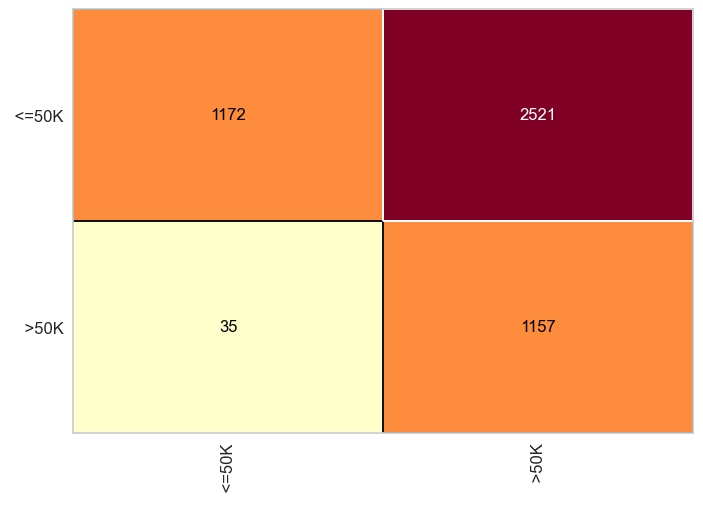

In [24]:
confusion_matrix = ConfusionMatrix(naive_census)
confusion_matrix.fit(X_census_treinamento, y_census_treinamento)
confusion_matrix.score(X_census_teste, y_census_teste)

In [26]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



o algortimo consegue identificar (*recall*) `97%` das pessoas que ganham >50K e quando identifica essas pessoas, a precisão é de somente `31%`.  

o algortimo consegue identificar (*recall*) `32%` das pessoas que ganham <50K e quando identifica essas pessoas, a precisão é de `97%`.